# Machine Learning 2022
## Lab. 5 - Overfitting - regularization
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 29.03.2022

### Grupa: wtorek 9:30 - 11:00


### L2 and L1 regularization for linear estimators

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
target = pd.DataFrame(boston.target)


In [5]:
bos.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [6]:
target.head(4)

,0
0,24.0
1,21.6
2,34.7
3,33.4


Ex. 1 - spliting data for train and test sets

In [7]:
from sklearn.model_selection import train_test_split

X = np.array(bos)
y = np.array(target)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [9]:
print(X.shape[0])
print(f"Training size {float(X_train.shape[0]) / float(X.shape[0]):0.3f}")
print(f"Test size {float(X_test.shape[0]) / float(X.shape[0]):0.3f}")

506
Training size 0.798
Test size 0.202


Ex. 2 - Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

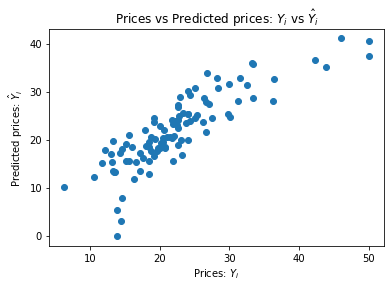

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Ex. 3 - Mean Squared Error computing

In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f"For a following data prediction MSE= {mse:0.5f}")

For a following data prediction MSE= 17.93304


Ex. 4 - Model score computing, data scaling, usage of PolynomialFeatures()

In [13]:
linreg.score(X_test, y_test)

0.7181173900062068

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X,y)




from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features= PolynomialFeatures(degree=2)


X_poly = polynomial_features.fit_transform(X_scaled, y)

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size=0.2, random_state=30)

linreg2 = LinearRegression()

linreg2.fit(X_train2, y_train2)

y_pred2 = linreg2.predict(X_test2)

Results after scaling and usage PolynomialFeatures()

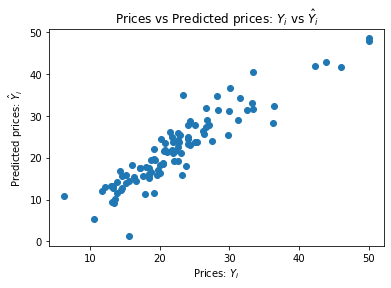

In [16]:
plt.scatter(y_test2, y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

MES - we can see that, now result is better

In [17]:
mse = mean_squared_error(y_test2, y_pred2)

print(f"For a following data prediction MSE= {mse:0.5f}")

For a following data prediction MSE= 12.13027


For model score, we also see progression.

In [18]:
linreg2.score(X_test2, y_test2)

0.8093289285351177

Ex.5 - Lasso Regression Model

In [19]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=30)

In [21]:
scores = list()
mse = list()

alphas = np.linspace(0.001, 1, 50)

for alpha in alphas:
    clf = Lasso(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    scores.append(clf.score(X_test, y_test))


C:\ProgramData\Anaconda3\envs\abd_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1121.5088518001141, tolerance: 3.6227128118811884
  model = cd_fast.enet_coordinate_descent(


Results for various value of alpha parameter

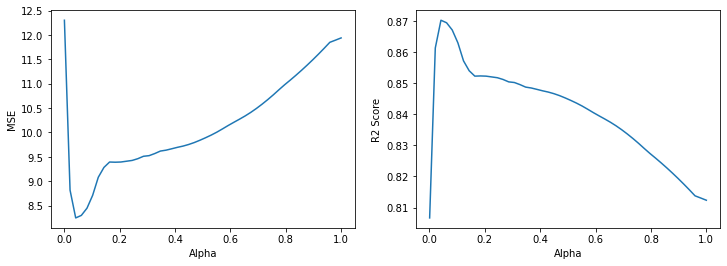

In [22]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.plot(alphas, mse, label='MSE')
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.subplot(122)
plt.plot(alphas, scores, label='R2 score')
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.show()

Ex. 6 - Ridge Regression Model

In [23]:
scores = list()
mse = list()

alphas = np.linspace(0, 200, 2000)

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    scores.append(clf.score(X_test, y_test))

Results for different value of alpha 

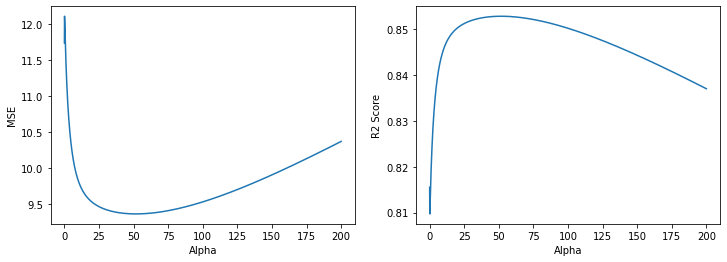

In [24]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.plot(alphas, mse, label='MSE')
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.subplot(122)
plt.plot(alphas, scores, label='R2 score')
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.show()

### Regularization for logistic regression

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [26]:
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

Ex. 1 - null check 

In [27]:

print(f"Number of null cells in X: {X.isnull().sum().sum()}")
print(f"Number of null cells in y: {y.isnull().sum().sum()}")

Number of null cells in X: 0
Number of null cells in y: 0


Ex. 2 - dividing data for train and test sets

In [28]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Ex. 3 - crating Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear')

logreg.fit(X_train, y_train.ravel())

y_pred= logreg.predict(X_test)


C:\ProgramData\Anaconda3\envs\abd_env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9122807017543859

Results of regression for various values of C parameter

In [31]:
scores = list()

for C in np.linspace(0.0001, 1, 10):
    logreg = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1e6)
    logreg.fit(X_train, y_train.ravel())
    y_pred= logreg.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))



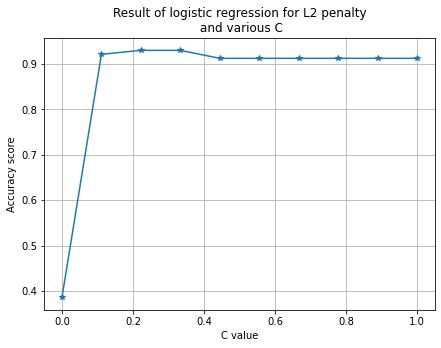

In [32]:
plt.figure(figsize=[7,5])
plt.plot(np.linspace(0.0001, 1, 10), scores,'*-')
plt.grid(1)
plt.xlabel('C value')
plt.ylabel('Accuracy score')
plt.title("Result of logistic regression for L2 penalty\n and various C")
plt.show()

As we can see above - the optimal value for C parameter is about ~0.3 in that case

### Regularization for kNN method

Results for various values of k - number of neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier

scores = list()
for k in range(1,51):
    kNN = KNeighborsClassifier(k)
    kNN.fit(X_train, y_train.ravel())
    y_pred = kNN.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


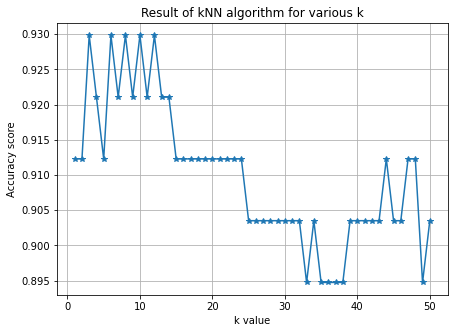

In [34]:
plt.figure(figsize=[7,5])
plt.plot(np.arange(1, 51), scores,'*-')
plt.grid(1)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.title("Result of kNN algorithm for various k")
plt.show()

As we can see above - the optimal value for k parameter is about ~6, 8, 10, 12

### Decision trees optimization

In [35]:
from sklearn.tree import DecisionTreeClassifier
 
scores = list()
for DEPTH in np.arange(2,42,2):
    clf = DecisionTreeClassifier(max_depth=DEPTH)
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


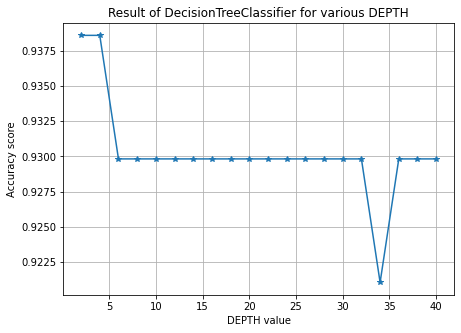

In [36]:
plt.figure(figsize=[7,5])
plt.plot(np.arange(2, 42,2), scores, '*-')
plt.grid(1)
plt.xlabel('DEPTH value')
plt.ylabel('Accuracy score')
plt.title("Result of DecisionTreeClassifier for various DEPTH")
plt.show()

As we can see above - the optimal value for max_depth parameter is about ~4